# Correlation Between News Sentiment and Stock Movement

## 🔍 Objective
Quantify the relationship between financial news sentiment and stock price movements by calculating daily returns and comparing them with average sentiment scores.
- Normalize and align financial news and stock data by date
- Apply sentiment analysis on news headlines using TextBlob
- Calculate stock return from daily closing prices
- Quantitatively assess the correlation between sentiment and stock returns

## Import Libraries and Custom Modules

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_alignment import align_datasets_by_date
from src.sentiment_analysis import apply_sentiment_analysis, aggregate_daily_sentiment
from src.correlation_analysis import calculate_daily_returns, merge_sentiment_with_returns, compute_correlation

## Load Datasets

In [3]:
# Load datasets from exploratory EDA and technical analysis outputs
news_df = pd.read_csv("../data/raw_analyst_ratings.csv")
stock_df = pd.read_csv("../data/extracted/combined_stocks.csv")

In [4]:
# Preview datasets
print("News Data Sample:\n", news_df.head())
print("Stock Data Sample:\n", stock_df.head())

News Data Sample:
    Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05

## Align Datasets by Date

In [5]:
aligned_news_df, aligned_stock_df = align_datasets_by_date(news_df, stock_df)

In [6]:
# Display shape and sample
print(f"Aligned News Shape: {aligned_news_df.shape}")
print(f"Aligned Stock Shape: {aligned_stock_df.shape}")
print("Aligned News Sample:\n", aligned_news_df[['date', 'headline']].head())

Aligned News Shape: (55230, 6)
Aligned Stock Shape: (15204, 10)
Aligned News Sample:
          date                                           headline
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...


**Analysis:** This ensures both datasets only contain matching trading dates, eliminating misalignment errors.

## Apply Sentiment Analysis

In [7]:
aligned_news_df = apply_sentiment_analysis(aligned_news_df, text_column='headline')
print("Sample Sentiment Scores:\n", aligned_news_df[['headline', 'sentiment']].head())

Sample Sentiment Scores:
                                             headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


**Analysis:** Sentiment polarity ranges from -1 (very negative) to +1 (very positive), with 0 being neutral.

## Aggregate Sentiment by Day

In [8]:
daily_sentiment_df = aggregate_daily_sentiment(aligned_news_df, date_column='date')
print("Daily Average Sentiment:\n", daily_sentiment_df.head())

Daily Average Sentiment:
          date  avg_sentiment
0  2011-04-27       0.000000
1  2011-04-28       0.068182
2  2011-04-29       0.166667
3  2011-05-02      -0.009259
4  2011-05-03       0.000000


### Plot: Daily Sentiment Over Time

/tmp/ipykernel_66174/2881191594.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/micha/Downloads/course/10-accademy/week-1/news-sentiment-stock-analysis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


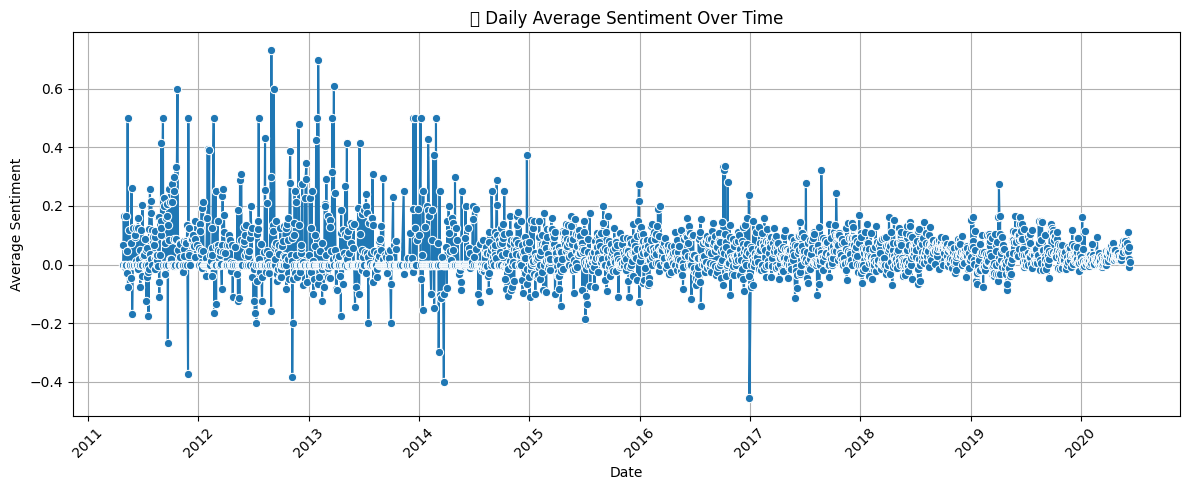

In [9]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sentiment_df, x='date', y='avg_sentiment', marker='o')
plt.title("📈 Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:** This reduces noise by averaging all headline sentiments published on the same day.

## Calculate Daily Stock Returns

In [10]:
stock_with_returns_df = calculate_daily_returns(aligned_stock_df, price_column='Close', date_column='date')
print("Daily Returns:\n", stock_with_returns_df[['date', 'Close', 'daily_return']].head())

Daily Returns:
              date      Close  daily_return
0      2011-04-27   0.482500           NaN
12978  2011-04-27   9.831500     19.376166
4452   2011-04-27  13.393797      0.362335
10752  2011-04-27  26.379999      0.969568
8526   2011-04-27   1.805333     -0.931564


### Plot: Daily Stock Returns

/tmp/ipykernel_66174/506602305.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/micha/Downloads/course/10-accademy/week-1/news-sentiment-stock-analysis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


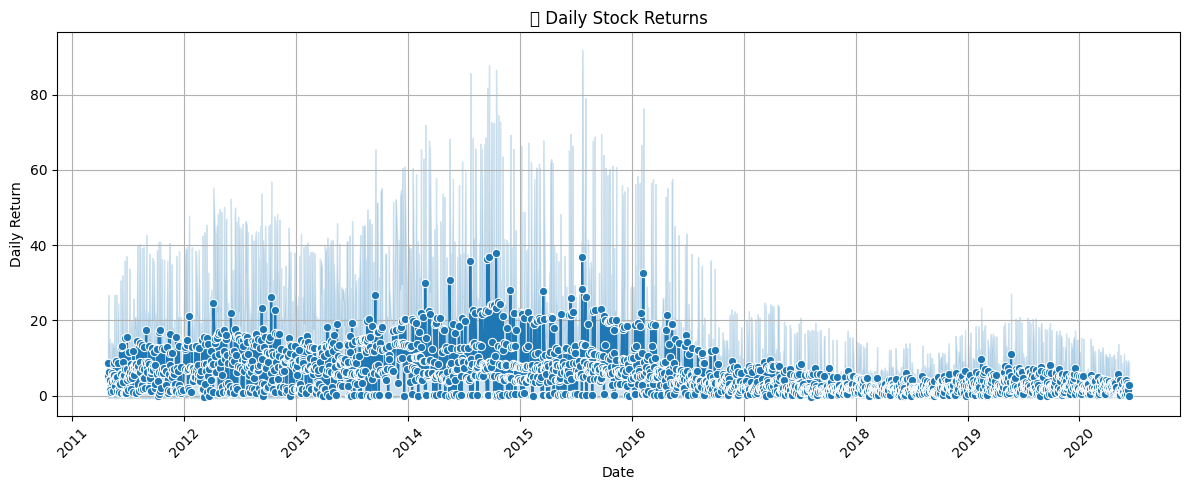

In [11]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=stock_with_returns_df, x='date', y='daily_return', marker='o')
plt.title("📉 Daily Stock Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:** Returns represent percent change from the previous day's close, which is a common metric in financial analysis.

## Merge Sentiment and Returns by Date

In [12]:
combined_df = merge_sentiment_with_returns(stock_with_returns_df, daily_sentiment_df)
print("Combined Data Sample:\n", combined_df[['date', 'avg_sentiment', 'daily_return']].head())

Combined Data Sample:
          date  avg_sentiment  daily_return
0  2011-04-27            0.0           NaN
1  2011-04-27            0.0     19.376166
2  2011-04-27            0.0      0.362335
3  2011-04-27            0.0      0.969568
4  2011-04-27            0.0     -0.931564


**Analysis:** Now each row includes both stock return and average sentiment for the same day.

## Compute Correlation Between Sentiment and Returns

In [13]:
correlation = compute_correlation(combined_df)

📈 Pearson correlation: 0.0013 (p-value: 0.8729)


### Plot: Sentiment vs Daily Return (Scatter)

/tmp/ipykernel_66174/1117463173.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/micha/Downloads/course/10-accademy/week-1/news-sentiment-stock-analysis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


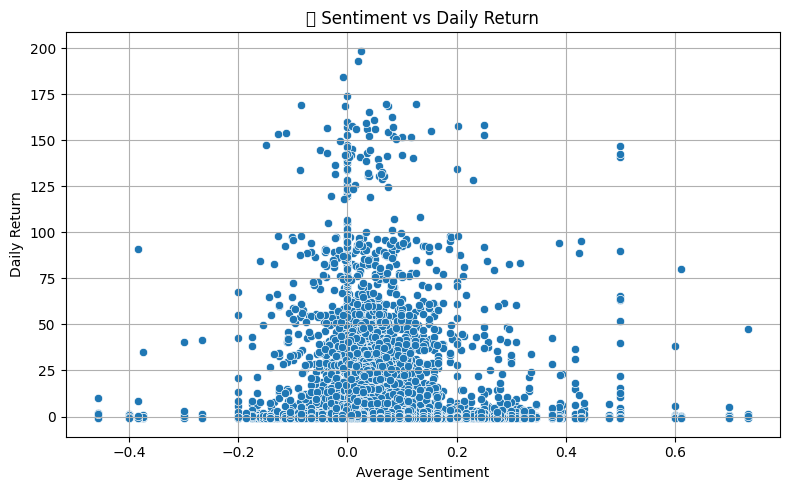

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='avg_sentiment', y='daily_return')
plt.title("📊 Sentiment vs Daily Return")
plt.xlabel("Average Sentiment")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot: Combined Sentiment and Return Overlay

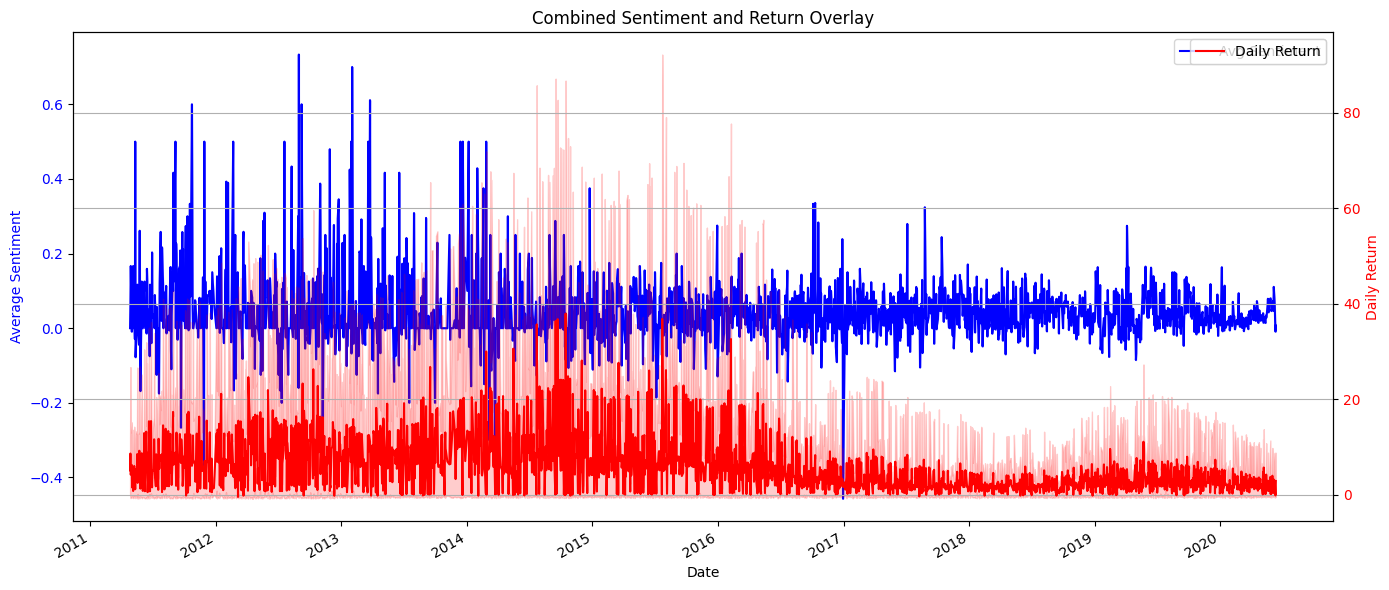

In [16]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Sentiment
sns.lineplot(x='date', y='avg_sentiment', data = combined_df, ax=ax1, label='Avg Sentiment', color='blue')
ax1.set_ylabel('Average Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot return on secodnary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='date', y='daily_return', data=combined_df, ax=ax2, label='Daily Return', color = 'red')
ax2.set_ylabel('Daily Return', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Combined Sentiment and Return Overlay")
ax1.set_xlabel("Date")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:** The Pearson correlation reveals the degree to which sentiment predicts or reflects market return trends. Correlation values:
- Close to 0: Weak/no linear relationship
- Positive: Sentiment rises with returns
- Negative: Sentiment rises while returns drop

The Pearson correlation value obtained was **0.0013** with a p-value of **0.8729**.
- This result indicates **no meaningful linear relationship** between daily news sentiment and stock price movements.
- The correlation is very close to zero, and the high p-value confirms it is not statistically significant.
- In practical terms, this suggests that on the days evaluated, market reactions were likely influenced more by other factors (macroeconomic events, earnings reports, technical signals) than by average daily news sentiment.


**Key Insight:** Despite thorough alignment and analysis, the sentiment-return correlation was negligible and not statistically significant for this dataset. This underlines the importance of multi-factor models and broader datasets in financial forecasting.